# Assignment 5, Question 5: Missing Data Analysis

**Points: 15**

Apply and compare different missing data strategies on the clinical trial dataset.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import utilities from Q3
from q3_data_utils import load_data, detect_missing, fill_missing

# Load the data
df = load_data('data/clinical_trial_raw.csv')
print(f"Loaded {len(df)} patients")

# Prewritten visualization function for missing data
def visualize_missing_data(missing_counts):
    """
    Create a bar chart of missing values by column.
    
    Args:
        missing_counts: pandas Series with missing value counts per column
    """
    plt.figure(figsize=(10, 6))
    missing_counts.plot(kind='bar')
    plt.title('Missing Values by Column')
    plt.xticks(rotation=45)
    plt.ylabel('Number of Missing Values')
    plt.tight_layout()
    plt.show()

Loaded 10000 patients


## Part 1: Detect Missing Data (3 points)

1. Use the `detect_missing()` utility to find missing values
2. Visualize missing data with a bar plot
3. Calculate the percentage of missing values per column

Missing values per column (Counts)
patient_id               0
age                      0
sex                      0
bmi                    438
enrollment_date          0
systolic_bp            414
diastolic_bp           414
cholesterol_total      554
cholesterol_hdl        554
cholesterol_ldl        554
glucose_fasting        369
site                     0
intervention_group       0
follow_up_months         0
adverse_events           0
outcome_cvd              0
adherence_pct         1467
dropout                  0
dtype: int64
Missing values per column (Percentages)
patient_id              0.0%
age                     0.0%
sex                     0.0%
bmi                    4.38%
enrollment_date         0.0%
systolic_bp            4.14%
diastolic_bp           4.14%
cholesterol_total      5.54%
cholesterol_hdl        5.54%
cholesterol_ldl        5.54%
glucose_fasting        3.69%
site                    0.0%
intervention_group      0.0%
follow_up_months        0.0%
adverse_events      

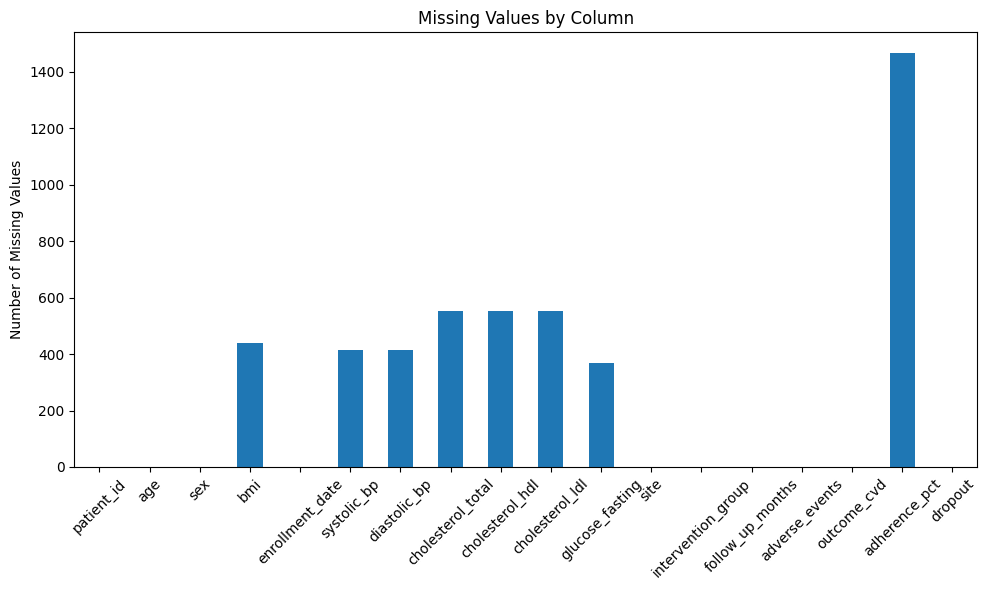

In [2]:
# 1. Use detect_missing(df) to get missing value counts
missing_counts = detect_missing(df)

# 2. Calculate percentage of missing values per column  
percent_missing = missing_counts / len(df) * 100

# 3. Print both counts and percentages
print(f"Missing values per column (Counts)\n{missing_counts}")
print(f"Missing values per column (Percentages)\n{percent_missing.round(2).astype(str) + '%'}")

# 4. Identify which columns have missing data
columns_missing = missing_counts[missing_counts > 0]
print(f"Columns with missing data\n{columns_missing}")

# Optional: Use the visualization function above to create a bar chart
visualize_missing_data(missing_counts)

## Part 2: Compare Imputation Strategies (6 points)

For the 'cholesterol_total' column (which has missing values):

1. Fill with mean using `fill_missing()` utility
2. Fill with median using `fill_missing()` utility  
3. Forward fill using pandas `.fillna(method='ffill')`
4. Compare the three strategies - create a summary table showing:
   - Original mean/median
   - Mean/median after each strategy
   - How many values were filled

In [3]:
# Get Original Data Statistics
chol_original = df['cholesterol_total']
o_mean = chol_original.mean()
o_median = chol_original.median()
o_null = chol_original.isnull().sum()

# Get Mean Filled Statistics
df_chol_mean = fill_missing(df, 'cholesterol_total', strategy = 'mean')
filled_mean = df_chol_mean['cholesterol_total']
fmean_mean = filled_mean.mean()
fmean_median = filled_mean.median()
fmean_null = o_null

# Get Median Filled Statistics
df_chol_median = fill_missing(df, 'cholesterol_total', strategy = 'median')
filled_median = df_chol_median['cholesterol_total']
fmedian_mean = filled_median.mean()
fmedian_median = filled_median.median()
fmedian_null = o_null

# Get Forward Fill Statistics
df_chol_ffill = fill_missing(df, 'cholesterol_total', strategy = 'ffill')
filled_ffill = df_chol_ffill['cholesterol_total']
fffill_mean = filled_ffill.mean()
fffill_median = filled_ffill.median()
## ffill does not necessarily fill in all missing values like mean/median
fffill_null = o_null - filled_ffill.isnull().sum() 

# Create and Output Summary Table 
summary_table = pd.DataFrame({
    'Mean' : [o_mean, fmean_mean, fmedian_mean, fffill_mean],
    'Median' : [o_median, fmean_median, fmedian_median, fffill_median],
    'Filled In' : [0, fmean_null, fmedian_null, fffill_null]
}, index = ['Original', 'Mean', 'Median', 'ffill'])
print(summary_table)

                Mean      Median  Filled In
Original  178.039488  177.000000          0
Mean      178.039488  178.039488        554
Median    177.981900  177.000000        554
ffill     178.070500  177.000000        554


## Part 3: Dropping Missing Data (3 points)

1. Drop rows where ANY column has missing data - how many rows remain?
2. Drop rows where specific columns have missing data (e.g., only 'age' or 'bmi')
3. Which approach loses less data?

In [4]:
print(f"Number of rows in original dataset: {len(df)}")

# Drop rows where ANY column has missing data
drop_any_col = df.dropna()
print(f"Number of rows after dropping if any column has missing data: {len(drop_any_col)}")

# Drop rows where specific columns have missing data (age, bmi)
drop_specific_col = df.dropna(subset = ['age', 'bmi'])
print(f"Number of rows after dropping if the 'age' or 'bmi' column contains missing data: {len(drop_specific_col)}")

# Shows which approach loses less data
print(f"Method that loses less data: {'Drop Any Column' if len(drop_any_col) > len (drop_specific_col) else 'Drop Specific Column'}")

Number of rows in original dataset: 10000
Number of rows after dropping if any column has missing data: 7133
Number of rows after dropping if the 'age' or 'bmi' column contains missing data: 9562
Method that loses less data: Drop Specific Column


## Part 4: Create Clean Dataset (3 points)

Apply your chosen strategy to create a clean dataset:
1. Choose appropriate imputation for numeric columns
2. Drop rows with missing critical values (e.g., patient_id, age)
3. Save to `output/q5_cleaned_data.csv`
4. Save a missing data report to `output/q5_missing_report.txt`

count    9446.000000
mean      178.039488
std        33.129034
min        91.000000
25%       155.000000
50%       177.000000
75%       200.000000
max       315.000000
Name: cholesterol_total, dtype: float64


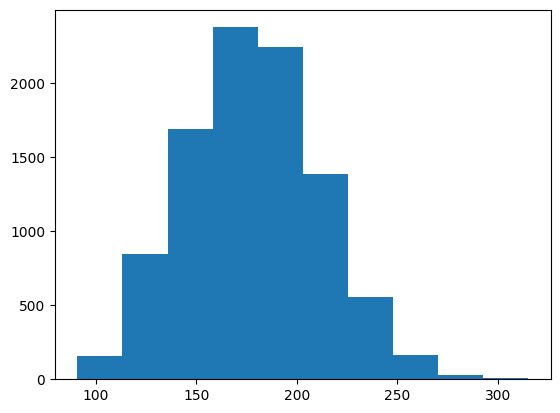

In [5]:
# Find appropriate imputation method
plt.hist(df['cholesterol_total'])
print(df['cholesterol_total'].describe())

# Implement imputation method
numeric_col = df.select_dtypes(include = ['number']).columns
for names in numeric_col:
    df = fill_missing(df, names, strategy = 'median')

# Drop rows with missing critical values
df_clean = df.dropna(subset = ['patient_id', 'age', 'outcome_cvd', 'dropout', 'adherence_pct'])

# Saving missing data report
df_clean.to_csv('output/q5_cleaned_data.csv', index = False)
with open('output/q5_missing_report.txt', 'w') as file:
    file.write("Missing Data Report\n\n")
    
    file.write("Original Dataset\n")
    file.write(f"Data dimensions: {df.shape}\n\n")
    file.write(f"Total missing values: {missing_counts.sum()}\n\n")
    file.write(f"Columns with missing values:\n{columns_missing}\n\n")

    file.write("Cleaning Method\n")
    file.write("(1) Performed median imputation on all numeric columns\n")
    file.write("(2) Dropped rows containing a missing value for: 'patient_id', 'age', 'outcome_cvd', 'dropout'\n\n")
    

    file.write("Final Dataset\n")
    file.write(f"Data Dimensions: {df_clean.shape}\n")
    file.write(f"Rows removed [None since numeric imputation was the only issue]: {len(df) - len(df_clean)}\n")
    file.write(f"Number of missing values remaining: {detect_missing(df_clean).sum()}")


## Reflection

Which imputation strategy would you recommend for this dataset and why?

**Your answer:**

The imputation strategy I chose to use is median imputation. The reason I chose median imputation over mean imputation is because mean imputation is sensitive to outliers. Prior to implementing median imputation, I created a quick histogram and looked at the summary statistics of the 'cholesterol_total' column to verify if outliers could be a problem. While the results proved not to be too significant, there did appear to still be a bit of skew, so I generally felt median imputation would add less bias to our dataset. As for why I didn't use the forward fill method, the reason I did not use this method is because our dataset is cross-sectional, whereas forward fill is better if the dataset is time series. 

However, it is important to note that our data does NOT appear to be missing at random. In Part 4, we were instructed to drop rows with missing critical values, of which the outcomes that were considered critical include 'adherence_pct'. If we were to do this first before imputation, we would lose all 'Yes' responses in the dropout variable.
